<div class="alert alert-info"><h4>Note</h4><p> 
    This notebook is still work in progress and the content has not been fact checked! <a href="url">here</a>.
</p></div>

# Jensen inequality: from an intractable integral to an optimization problem

As I mentioned in the previous chapter, since we can't compute the marginal likelihood directly, we can compute something else that's easier to calculate that we know should be roughly equivalent. This something else we can try to compute rely on the so-called **Jensen inequality**, which states that concave function, the function of the average is greater than or equal to the average of the function. This may sound a bit complicated at first. So for sake of clarity, let's replace 'a function' by the logarithmic function, which is clearly concave:

C:\Users\alexander.lepauvre\AppData\Local\Temp\ipykernel_9416\149632854.py:5: RuntimeWarning: divide by zero encountered in log
  y = np.log(xs)


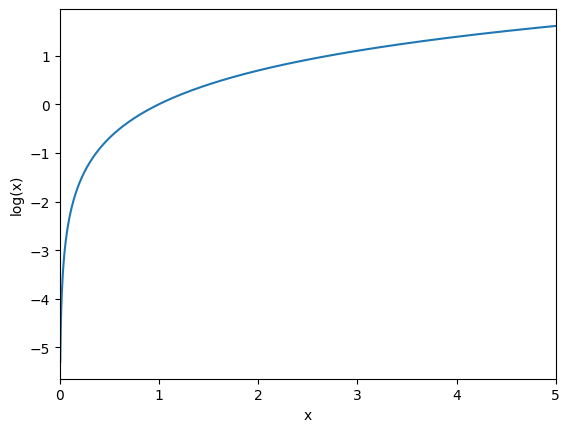

In [1]:
import numpy as np  
import matplotlib.pyplot as plt

xs = np.linspace(0, 5, 1000)
y = np.log(xs)

fig, ax = plt.subplots()
ax.plot(xs, y)
ax.set_xlim(0, 5)
ax.set_ylabel("log(x)")
ax.set_xlabel("x")
plt.show()
plt.close()

The Jensen inequality states the following:

$$f(\frac{x_1 + x_2}{2}) >= \frac{f(x_1) + f(x_2)}{2}$$

In other words, the function applied to the average of two values is greater than or equal to the average of the function applied to those values.

Using the logarithmic function, if we have $x_1=1$ and $x_3$, then we have: 

$$ln(\frac{1 + 3}{2}) >= \frac{ln(1) + ln(3)}{2}$$

$$ln(2) >= \frac{0 + 1.1}{2}$$

$$0.69 >= 0.55$$


We can again see that that's the case with code:

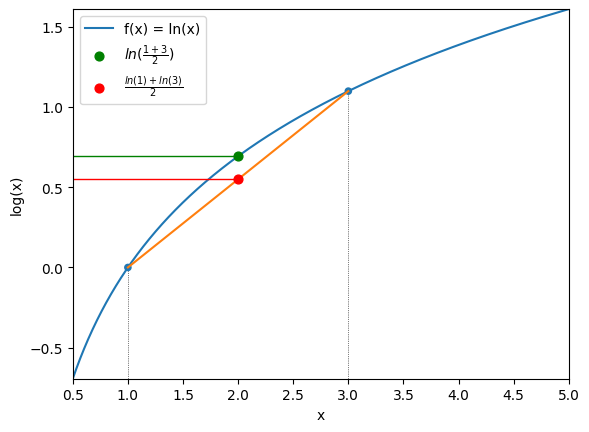

In [2]:
xs = np.linspace(0.5, 5, 1000)
y = np.log(xs)

fig, ax = plt.subplots()
ax.plot(xs, y, label="f(x) = ln(x)")
ax.scatter([1, 3], [np.log(1), np.log(3)], [20, 20], zorder=10)
ax.plot([1, 3], [np.log(1), np.log(3)], [40, 40], 'r', zorder=10)
ax.scatter([np.mean([1, 3])], np.log(np.mean([1, 3])), [40], 'g', zorder=10, label="$ln(\\frac{1 + 3}{2})$")
ax.scatter([np.mean([1, 3])], np.mean(np.log([1, 3])), [40], 'r', zorder=10, label="$\\frac{ln(1) + ln(3)}{2}$")
ax.vlines([1, 3], [-1, -1], [np.log(1), np.log(3)], 'k', linestyles=":", linewidth=0.5)
ax.hlines(np.log(np.mean([1, 3])), 0.5, 2, 'g', linestyles="-", linewidth=1)
ax.hlines(np.mean([np.log(1), np.log(3)]), 0.5, 2, 'r', linestyles="-", linewidth=1)
ax.set_xlim(0.5, 5)
ax.set_ylim(np.log(0.5), np.log(5))
ax.set_ylabel("log(x)")
ax.set_xlabel("x")
plt.legend()
plt.show()
plt.close()

This is just an example with the logarithmic function, but that's true of any concave function. We can express it more generally:

$$f(\frac{x_1 + x_2}{2}) >= \frac{f(x_1) + f(x_2)}{2}$$

Before we can go further, we need to introduce a new concept that you may not be familiar with, eventhough you have been using it a lot without knowing: Expectation

## Expectation

According to the Jensen Inequality, the average of a log is inferior or equal to the log of an average. This way of describing it is however a bit too restrictive, because an average is in fact a specific case of something else: an **Expectation**. To be precise, an average is basically an expectation, when the variable we are dealing with is discrete. When computing your GPA, you have a finite number of grades, and you want to know the "Expected value" across all these grades. But you can compute an "average" if you will for any functions. When you take the log function for example, you can also compute the Expectation of that function. In probability theory, it is quite common to want to compute the Expectation of a random variable that follows any kind of probability distribution. 

As we have seen in the previous chapters, all probability distributions are mathematical functions, and we can compute the Expectation of a variable following that particular probability distribution. The general formulae for an Expectation of a continuous variable is this:

$$\bold{E}[X] = \int_{-\infty}^{+\infty}x \cdot f(x) dx$$

Where:
- x: a continuous random variable
- f(x): a probability distribution applied to that variable

It is quite intuitive: the expected value is basically the sum of each value of x, weighted by its probability. So it is just the same thing as a weighted average. With your GPA, the weighted average is the sum of each grade multiplied by the coefficient of that grade, then the whole divided by the sum of all coefficients. But that is also equivalent to dividing each coefficient by the total sum of coefficients, such that each weight is below 1, and multiplying each grade by that normalized coefficient. It's the same thing in the formulae above, just using an integral instead of a sum, because the variable is continuous and not discrete. 

And funny enough, if the function $f(x)$ were to be the normal distribution, then the value you would end up with by solving this formula would be it $\mu$ parameter, so it all adds up. And we could in fact play around with the formulae and end up with the formulae you can look up for calculating the average of a normal distribution: once again, mathematician got annoyed dealing with a complicated function with an integral, and someone went and found an easier solution that gives the same result. No magic. 

One last piece of information, is that you can do the same where instead of looking at a random variable $x$, you can also look at the expectation of a function:

$$\bold{E}[g(x)] = \int_{-\infty}^{+\infty}g(x) \cdot f(x) dx$$

Where:
- x: a continuous random variable
- g(x): any function that takes an input x and returns another value
- f(x): a probability distribution applied to that variable

That's probably a bit of a confusing concept, but basically, you can compute the weighted average of any function given any probability distrubion $f(x)$. So you could for example compute the Expectation of the function: $g(x) = x^2$, given a normal distribution $f(x)$. It may feel very confusing and really unclear why you would ever want to do something like this. As often in math, things feels obscurely complicated and pointless, but that's just because if you have never encountered a concept and have never seen why it is useful, it feels pointless. So the best you can do for now is just take it as it is: you can compute the Expectation (which is roughly speaking the same thing as an average) of any function weighted by any probability distribution. At least in theory, some combinations may not be solvable anatyically [read: would require you to compute an infinity of numbers to get one out]


So the Jensen inequality can be written as follows:

$$f(E[X]) >= E[f(x)]$$

And if you replace the function by the logarithmic, then you have this:

$$ln(E[X]) >= E[ln(x)]$$

That's just the general form of what we said above, which now works for any function. Furthermore, we don't need to specify several values of x (like we said 1 and 3), now the inequality holds for any values of x. And if that helps, in the case of the logarithmic function, you can rewrite the inequality like so:

$$ln(\int_{-\infty}^{+\infty}x \cdot f(x) dx) >= \int_{-\infty}^{+\infty}ln(x) \cdot f(x) dx$$

If you get confused by the weird E letter. It's all the same thing.

In the example above with the logarithmic function, we showed that the log of the average of 1 and 3 is more than the average of log of 1 and log of 3. But with this more general formulation, we can see that the inequality holds true if we were to take any values between 1 and 3 instead:

$$ln(\int_{1}^{3}x \cdot f(x) dx) >= \int_{1}^{3}ln(x) \cdot f(x) dx$$

Assuming that f(x) is a uniform distribution, such that the likelihood of each value is the same (i.e. non-weighted average), we can compute it like so:

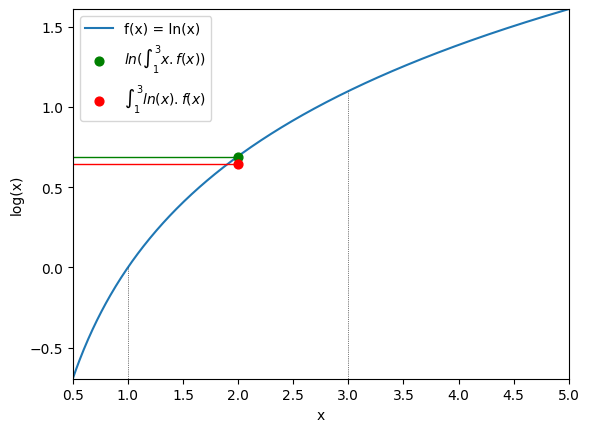

In [3]:
xs = np.arange(0.5, 5, 0.01)
x0 = 1
x1 = 3
steps = 0.01
y = np.log(xs)

x = np.mean(np.arange(x0, x1, 0.01))
log_of_average = np.log(x)  # The log of the Expectation of all values between 1 and 3
average_of_log = np.mean(np.log(np.arange(x0, x1, 0.01)))  # The Expectation of the log of all values between 1 and 3

fig, ax = plt.subplots()
ax.plot(xs, y, label="f(x) = ln(x)")
ax.scatter(x, log_of_average, [40], 'g', zorder=10, label="$ln(\\int_{1}^3 x . f(x))$")
ax.scatter(x, average_of_log, [40], 'r', zorder=10, label="$\\int_{1}^3 ln(x) . f(x)$")
ax.vlines([1, 3], [-1, -1], [np.log(1), np.log(3)], 'k', linestyles=":", linewidth=0.5)
ax.hlines(np.log(np.mean(np.arange(x0, x1, 0.01))), 0.5, 2, 'g', linestyles="-", linewidth=1)
ax.hlines(np.mean(np.log(np.arange(x0, x1, 0.01))), 0.5, 2, 'r', linestyles="-", linewidth=1)
ax.set_xlim(0.5, 5)
ax.set_ylim(np.log(0.5), np.log(5))
ax.set_ylabel("log(x)")
ax.set_xlabel("x")
plt.legend()
plt.show()
plt.close()

## The log model evidence as an expectation

How does that help? The marginal likelihood ($P(y)$) should return a single number, but we can't calculate it because of the integral. So we have to try to find something else that we can calculate that will get us close to that. According to the Jensen inequality, if we have a concave function, then we know that the output of that function at the average of some inputs is always going to be at least equal or more than the average of that function's output at all of those same inputs. This gets us on track to our approximate. 

The logarithmic function is a concave function, which means that the Jensen inequality applies to it. And the marginal likelihood return a single number. So if instead of looking for $P(x)$, we want to find $ln P(x)$, then the Jensen inequality applies. But if we want to write a formula like so:

$$ln P(y) >=  E[???]$$

We are a bit stuck. That's because the Jensen inequality stats that the log of an expectation (i.e. average) is always at least more than the expectation of a log. But the P(y) is not the average of something, so we can't compute the average of that log either to write the other part of the equation. 

But we can see the problem in another direction: if we could express the marginal likelihood as an average of some sorts, then we would be able to write the missing part of the equation above. So let's try to express the marginal likelihood as an expectation. 

The formula of an expectation is in fact not too far off that of the model evidence. Both have an intergal in there:

$$ln P(y) = ln \int_{-\infty}^{+\infty} P(y|\Theta) P(\Theta) d\Theta$$

For the sake of avoiding too long and beefy formulae, I am going to introduce a novel notation:

$$P(y|\Theta) P(\Theta) = P(y, \Theta)$$

$P(y, \Theta)$ is the **joint probability** of $y$ and $\Theta$, and it is equal to the likelihood times the prior. Don't get confused by that notation and don't mix up $P(y|\Theta)$ (the likelihood) and $P(y, \Theta)$ (the joint probability)!

So we can rewrite the log of the  marginal likelihood as so:

$$ln P(y) = ln \int_{-\infty}^{+\infty} P(y, \Theta) d\Theta$$

Note that the joint probability is itself a probabity distribution, which is just a special kind of mathematical function. So what we have here is an integral of some function. And we saw that an expectation is the integral of the product between one function (or random variable) and a probability distribution:

$$ln \int_{-\infty}^{+\infty}g(x) \cdot f(x) dx$$

To express the log of the model evidence as an expectation, we would need to multiply it by a probability distribution. In other words, we could $P(y, \Theta)$ is $g(x)$ and multiply it by some probability distribution $f(x)$. But obviously, we can't multiply $P(y, \Theta)$ by anything else than 1, as that would change the result and not be equal to the model evidence anymore. 

But we can use a smart little trick: we can multiply $P(y, \Theta)$ by something that cancels each other out. We know that $f(x)$ should be a probalility distribution to express the log of the model evidence as an expectation to make use of the Jensen inequality, so there is only one thing we can divide it by to have it cancel out: itself. Instead of f(x), we will write this probability distribution to $Q(x)$, again, no particular reason, it'S just a convention. So we have the following:

$$ln P(y) = ln \int_{-\infty}^{+\infty} \frac{Q(\Theta)}{Q(\Theta)} P(y, \Theta) d\Theta$$

Nothing has changes whatsoever, we just wrote this essentially:

$$ln P(y) = ln \int_{-\infty}^{+\infty} 1 \times P(y, \Theta) d\Theta$$

BUT, this is a nice trick, because it enables us to rewrite the model evidence as an expectation:

$$ln P(y) = ln \int_{-\infty}^{+\infty} g(x) \cdot Q(\Theta) d\Theta$$

Where:

$$g(x) = \frac{P(y, \Theta)}{Q(\Theta)}$$

So we have something, times a probability distribution, in other words, we now have:

$$ln P(y) = ln E_{Q(\Theta)}\bigg[\frac{P(y, \Theta)}{Q(\Theta)}\bigg]$$

And here we go, we can make use of the Jensen inequality:

$$ln E_{Q(\Theta)}\bigg[\frac{P(y, \Theta)}{Q(\Theta)}\bigg] >=  E_{Q(\Theta)}\bigg[ln\frac{P(y, \Theta)}{Q(\Theta)}\bigg]$$

Just to reiterate, don't get confused by the Expectation symbol, the above equation is exactly the same as this one:

$$ln P(y) >=  E_{Q(\Theta)}\bigg[ln\frac{P(y, \Theta)}{Q(\Theta)}\bigg]$$

## Free energy: a lower bound on the model evidence
Thanks to the Jensen inequality, we can circumvent the direct calculation of the model evidence and instead try to calculate the expectation of the log of the joint probability divided by the probability distribution $Q(\Theta)$. We will discuss in the next section what exactly that $Q(\Theta)$. **Don't get confused**: we have not gotten rid of the integral with this inequality, eventhout the integral symbol is not present in the right side of the equation. If you remember what we wrote above, the right part of the equation in the inequality right above is in fact:

$$E_{Q(\Theta)}\bigg[ln\frac{P(y, \Theta)}{Q(\Theta)}\bigg] = \int_{-\infty}^{+\infty} ln \frac{P(y, \Theta)}{Q(\Theta)} \cdot Q(\Theta) d\Theta$$

So we have again the same question: How does that help? The answer is that with the Jensen inequality trick, we have turned the unsolvable model evidence into an optimization problem. We know that the result of this function can only be smaller or equal to the model evidence, not higher. In other words, it can maximally be equal to the marginal likelihood. And this is helpful because this gives us a direction in which to go when we try to approximate that quantity. The marginal likelihood could be positive or negative, and we would have no clue on whether any approximation of its value is going in the right direction. With the Expectation of the log described above, we can play with various parameters: we know that the higher the value the better, so we can continue playing around until we don't see an increase in value anymore! In mathematical linguo, we say that we have converted this unsovable integral into an optimization problem, which can actually be tackled using a combination of analytical tricks and computational methods (which we will see in the next chapter).

So now, in order to approximate the marginal likelihood, we need to maximize the value of the expectation of the log. But what is it we can actually 'play around with'? When you look at the equation, you will see that some parameters are actually fixed. The numerator $P(y, \Theta)$ is the joint probability, which is equal to the likelihood ($P(y|\Theta)$) times the prior ($P(\Theta)$), both of which are fixed. That leaves only $Q(\Theta)$. In the previous section, we said that $Q(\Theta)$ is a probability distribution, so that we can express the marginal likelihood as an expectation. That means that it is a mathematical function that takes as input any values of the parameters of our model and return a probability (which integrates to 1 across all possible inputs). But at this point, we know nothing more about it.

Therefore, in order to approximate the marginal likelihood, we need to find the parameters of $Q(\Theta)$ that maximize the Expectation of the log (the right hand formula in the Jensen inequality). And the resulting value of the formula with that $Q(\Theta)$ distribution is the **evidence lower bound (ELBO)**. In other words, we have a function that takes as input the probability distribution $Q(\Theta)$ and returns as a value the Expectation of the log under that distribution:

$$F[Q(\Theta)] = E_{Q(\Theta)}\bigg[ln\frac{P(y, \Theta)}{Q(\Theta)}\bigg]$$

This function is actually a functional, a function that takes another function as an input. This is the **Free energy functional**, and yes, its the same one as the free energy principle in neuroscience. And the max of the Free energy functional is the **ELBO**, but it is therefore also simply called the **Free energy**. 

At this point, there is probably one detail that is bugging you: we can play around with the parameters of the $Q(\Theta)$ all we want, that doesn't get rid of the problem of the integral. To compute the result of the Free energy functional with a particular $Q(\Theta)$, we still need to integrate over all values of $\Theta$, which we can't do, so how can we optimize the free energy functional? This will be the topic of the next chapter: how can we approximate the result of the free energy functional? But also: why can we approximate the result of an integral when it is in the free energy functional, but not when it is in the marginal likelihood? But before we can go into the next chapter, we still need to discuss a bit about $Q()\Theta$

## What's $Q(\Theta)$ supposed to be?

To be able to write the marginal likelihood as an Expectation, we had to introduce a probability distribution $Q(\Theta)$. And we needed to write the marginal likelihood as an Expectation so that we can write it's lower bound as the expectation of the log of that. If that sounds confusing, know that all the information you need understand are actually stated in the previous sentence. The only reason there is this $Q(\Theta)$ is literally just to be able to write the marginal likelihood as an expectation. We couldn't use anything else than a probability distribution, because an Expectation is defined as the product between a probability distribution and a function (any function). That's it.

$Q(\Theta)$ is a probability distribution, which means that it is a mathematical function that returns the probability of each value of $\Theta$. In addition, this function integrates over 1, which it needs to in order to be a probability distrubion. But that is all we have specified so far. The $\Theta$ is the same $\Theta$ as we have everywhere: it is our model parameter. This means that this probability distribution takes as input the values of each parameter and return the probability of these values. It could be any probability distribution that can accomodate our parameter, and the inequality would hold. 

Just for the sake of example, let's imagine that the $Q(\Theta)$ is a multivariate normal distribution. I am not saying that it is, I am just using a normal distribution to make more concrete what we are trying to do with the free energy functional. A multivariate normal distribution is parametrized as such:

$$Q(\Theta) \sim \mathcal{N}(\mu, \Sigma)$$

Or in other words:

$$P(\Theta) = \frac{1}{(2\pi)^{p/2}|\mathcal{\Sigma}|^{1/2}}exp(-\frac{1}{2}(\mathcal{\Theta} - \mathcal{\mu})^T\Sigma^{-1}(\mathcal{\Theta}-\mathcal{\mu}))$$

where:
- $\mu = \begin{bmatrix}\mu\beta_0\\\mu\beta_1\\\mu_\sigma^2\\...\end{bmatrix}$ mean parameter of the multivariate normal distribution (one value for each parameter of the model)
- $\sigma = \begin{bmatrix}\sigma_{\beta_{0}}^2,\ cov{\beta_0, \beta_1},\ ...\\cov{\beta_1, \beta_0},\ \sigma_{\beta_1}^2,\ ...\\...,\ ...,\ ...\end{bmatrix}$ variance covariance matrix of the parameters of the model
- $p$: Number of parameters

**Again, don't get confused**. We have already seen multiple instances of the multivariate distribution in various places, so don't mix them up. If you remember, the likelihood of the data was also a multivariate normal distribution, defining the likelihood of the data under each possible values of the parameters. The prior distribution of the beta parameters is also a multivariate distribution, describing our prior belief in the likelihood of particular values of the beta parameters. Here if $Q(\Theta)$ is a normal distribution, then to find max of the free energy functional, we can play around with all possible combination of values in the $\mu$ vector and inside the $\Sigma$ matrix to find the one that yields the largest possible number. In other words, optimizing the free energy function implies finding the inputs of the parametrization of the $Q(\Theta)$ that yield the highest value.


### $Q(\Theta)$ is an approximation of...

Hopefull this all make sense. Now, as it turns out, $Q(\Theta)$ is not just a distribution we pulled out of nowhere to be able to write the marginal likelihood as an expectation. It actually corresponds to a very important part of the Bayes theorem. To see this, we can rewrite the free energy functional a bit differently:

$$F[Q(\Theta)] = E_{Q(\Theta)}\bigg[ln\frac{P(y, \Theta)}{Q(\Theta)}\bigg]$$

$$F[Q(\Theta)] = E_{Q(\Theta)}[ln P(y, \Theta) - lnQ(\Theta)]$$

That's because with the logarithmic, a division is equal to a substraction. Nothing crazy here. One more thing you probably know (or knew and forgot) from your highschool probabilty classes is the **chain rule**. According to the chain rule:

$$P(A, B) = P(A|B)P(B) = P(B|A)P(A)$$

According to the chain rule:

$$P(y, \Theta) = P(y|Theta)P(\Theta) = P(\Theta|y)P(y)$$

Accordingly:

$$F[Q(\Theta)] = E_{Q(\Theta)}[ln P(\Theta|y)P(y) - lnQ(\Theta)]$$

And again, we can simplify multiplication by sum with the logarithmic, so:

$$F[Q(\Theta)] = E_{Q(\Theta)}[ln P(\Theta|y) + ln P(y) - lnQ(\Theta)]$$

And one last thing that you already know because we have seen many times in previous chapter, when you have a term in an integral that doesn't involve the term that you are integrating over, then you can take it out of the integral. We have one such term in the equation above:

$$F[Q(\Theta)] = ln P(y) + E_{Q(\Theta)}[ln P(\Theta|y) - lnQ(\Theta)]$$

Looking at that equation, you might think: great, we are back to square one, we have the expectation part, but on top of that we have the log of the marginal evidence on its own. But that's actually a wrong understanding of the function above. The function above basically says: 'The free energy functional is equal to the log of the marginal evidence, plus something else, that something else being an expectation'. Based on what we say, that makes sense: the free energy functional is a lower bound on the log marginal likelihood, which means it is always going to be equal to the log of the marginal likelihood, minus a little something. The fact that the equation above has a + sign may be a bit confusing, but that's simply because the expectation term in that case is always negative.

The important part is this: in the above formula, the marginal likelihood is what we are trying to approximate, which is a fixed quantity. So if we bring the $E_{Q(\Theta)}[ln P(\Theta|y) - lnQ(\Theta)]$ term to be as close as possible to 0, then the free energy is as close as possible to the log of the free energy, and our approximation is as accurate as it can be. And because the $E_{Q(\Theta)}[ln P(\Theta|y) - lnQ(\Theta)]$ is a negative term, the largest possible value the free energy can take is the log of the marginal likelihood, which again makes sense because of the Jensen inequality. 

### ...The posterior distribution!
But what exactly is the expectation term here:

$$E_{Q(\Theta)}[ln P(\Theta|y) - lnQ(\Theta)]$$

It turns out that this formula corresponds to something very interesting:

$$E_{Q(\Theta)}[ln P(\Theta|y) - lnQ(\Theta)] = E_{Q(\Theta)}[\frac{ln P(\Theta|y)}{lnQ(\Theta)}] = -D_{KL}[Q(\Theta)||P(\Theta|y)]$$

The rightmost term is the Kullback-Leibler (KL) divergence. It is a measure of the distance between two probability distribution: the closer two distributions are the closest to 0 the KL divergence. So in other words, maximizing the free energy functional, i.e. making the free energy as close as possible to the log of the marginal likelihood, is equivalent to making the KL divergence between $Q(\Theta)$ and $P(\Theta|y)$ as small as possible, i.e. making these two distributions as close as possible to each other.

In other words, when we maximize the free energy, we are making $Q(\Theta)$ as similar as possible to $P(\Theta|y)$. You may have missed it, but we are here talking about $P(\Theta|y)$, which is... The posterior distribution! So we can now say: when maximizing the free energy by tweaking $Q(\Theta)$, $Q(\Theta)$ becomes an approximation of the posterior itself.

This may seem like a lot and feel a bit strange at first. But hopefully, you would agree that the math adds up. This is the reason why $Q(\Theta)$ is referred to as the **approximate prior**. And when we optimize the free energy, we both approximate the model evidence (i.e. marginal likelihood) and the posterior in one go!

## Recap
This chapter was the most technical so far, and you may feel a bit overwhelmed, especially given that we haven't even once talked about penguins. Just to make sure that things get cemented the right way, here is a recap of what we have seen:

- According to the Jensen inequality, the average of a log is always equal or more than the log of an average
- The log of the marginal likelihood can be expressed as an Expectation (average of sorts):
  
$$ln P(y) = ln E_{Q(\Theta)}\bigg[\frac{P(y, \Theta)}{Q(\Theta)}\bigg]$$

Where $Q(\Theta)$ is a probability distribution

- Following the Jensen inequality, the log of the marginal likelihood will always be more than the Expectation of the log:

$$ln P(y) >=  E_{Q(\Theta)}\bigg[ln\frac{P(y, \Theta)}{Q(\Theta)}\bigg]$$

- This inequality turns the intractable calculcation of the marginal likelihood into an optimization problem
- The free energy functional takes as input the probability distribution $Q(\Theta)$ and returns the Expectation of the log:

$$F[Q(\Theta)] = E_{Q(\Theta)}\bigg[ln\frac{P(y, \Theta)}{Q(\Theta)}\bigg]$$

- In order to approximate the log of the marginal likelihood, we need to find $Q(\Theta)$ that maximizes the free energy functional
- The result of the free energy function at that point is the **free energy**, also known as the **evidence lower bound** (as it is the lowest possible value the log of the evidence, a.k.a. the log of the marginal likelihood, can take)
- The distribution $Q(\Theta)$ that maximizes the free energy functional is the posterior distribution, which is why the distribution $Q(\Theta)$ is called the **approximate posterior**

Okay, so now that we have seen (and hopfully understood) all of that, it is time to tackle how to actually compute the free energy, or more precisely how to make it computable. 